Se realiza un análisis básico de los nacimientos en Bucaramanga des de 2016 hasta febrero de 2023. Los datos se pueden retomar públicamente desde https://www.datos.gov.co/Salud-y-Protecci-n-Social/43-Nacidos-Vivos-en-Municipio-de-Bucaramanga/x5xp-9w4b/about_data 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV (asegúrate de que esté en el directorio correcto)
df = pd.read_csv('nacBucaramanga2016202302.csv')

# Información del dataset
print("Información del dataset")
print("Registro de nacimientos en Bucaramanga, Santander entre el año 2016 y febrero de 2023.")

# Mostrar las primeras filas
print("Primeras filas del dataset")
print(df.head())

# Estadísticas básicas
print("Resumen estadístico del dataset")
print(df.describe())


C:\Users\anfalear\AppData\Local\Temp\ipykernel_2288\662568741.py:8: DtypeWarning: Columns (19,33,35,36,38,40,41,42,43,44,45,46,48,49,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nacBucaramanga2016202302.csv')


Información del dataset
Registro de nacimientos en Bucaramanga, Santander entre el año 2016 y febrero de 2023.
Primeras filas del dataset
  DEPARTAMENTO    MUNICIPIO     AREA NACIMIENTO      SITIO NACIMIENTO  \
0    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
1    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
2    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
3    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
4    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   

   CODIGO INSTITUCION       SEXO  PESO (Gramos)  TALLA (Centímetros)  \
0        6.800101e+11   FEMENINO         3520.0                 53.0   
1        6.800101e+11   FEMENINO         3180.0                 52.0   
2        6.800101e+11   FEMENINO         3000.0                 50.0   
3        6.800101e+11  MASCULINO         3540.0                 55.0   
4        6.800101e+11   FEMENINO         3430.0                


Valores faltantes en las columnas:
DEPARTAMENTO                           0
MUNICIPIO                              0
AREA NACIMIENTO                        0
SITIO NACIMIENTO                       2
CODIGO INSTITUCION                    28
SEXO                                   2
PESO (Gramos)                          7
TALLA (Centímetros)                    7
HORA NACIMIENTO                        3
PARTO ATENDIDO POR                     2
TIEMPO DE GESTACIÓN (Semanas)         10
NUMERO CONSULTAS PRENATALES           10
TIPO PARTO                             2
MULTIPLICIDAD EMBARAZO                 2
APGAR1                                73
APGAR2                                73
GRUPO SANGUINEO                      147
FACTOR RH                            147
PERTENENCIA ÉTNICA                     2
GRUPO INDIGENA                     65557
EDAD MADRE                           228
ESTADO CONYUGAL MADRE                228
NIVEL EDUCATIVO MADRE                386
ULTIMO AÑO APROBADO M

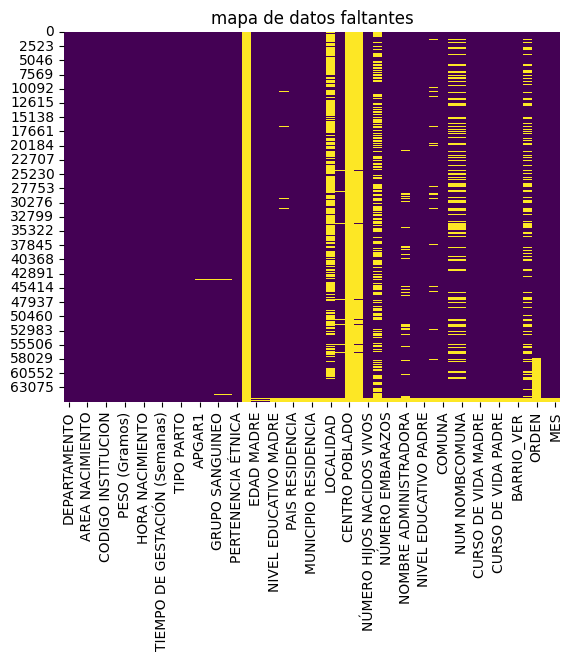

In [13]:
# 2. Limpieza de los datos
# Manejo de valores faltantes
print("\nValores faltantes en las columnas:")
# Toma el dataset y verifica cuales son los valores faltantes,
#a cada valor faltante da el valor TRUE y suma cuantos hay, e imprime el resultado
df.isnull().sum()
# Debido a que hay columnas con muchos datos faltantes, se eliminarán estas columnas
# si es un número mayor a 30 datos faltantes.
# Identificar datos faltantes
faltantes = df.isnull().sum()
print(faltantes)

#Mapa de calor de datos
sns.heatmap(df.isnull(), cbar=False,cmap="viridis")
plt.title("mapa de datos faltantes")
plt.show()

SEXO                             2
PESO (Gramos)                    0
TALLA (Centímetros)              0
HORA NACIMIENTO                  3
PARTO ATENDIDO POR               2
TIEMPO DE GESTACIÓN (Semanas)    0
NUMERO CONSULTAS PRENATALES      0
TIPO PARTO                       2
MULTIPLICIDAD EMBARAZO           2
dtype: int64


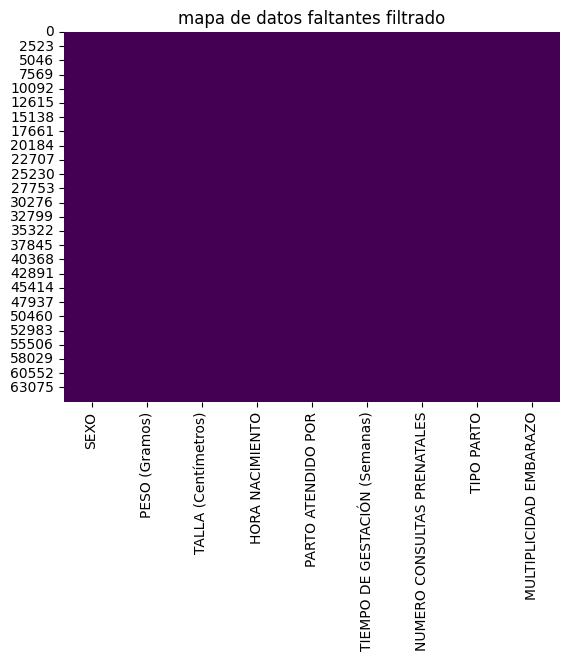

SEXO                             0
PESO (Gramos)                    0
TALLA (Centímetros)              0
HORA NACIMIENTO                  0
PARTO ATENDIDO POR               0
TIEMPO DE GESTACIÓN (Semanas)    0
NUMERO CONSULTAS PRENATALES      0
TIPO PARTO                       0
MULTIPLICIDAD EMBARAZO           0
dtype: int64
            SEXO  PESO (Gramos)  TALLA (Centímetros) HORA NACIMIENTO  \
0       FEMENINO         3520.0                 53.0        05:05:00   
1       FEMENINO         3180.0                 52.0        02:00:00   
2       FEMENINO         3000.0                 50.0        20:55:00   
3      MASCULINO         3540.0                 55.0        16:19:00   
4       FEMENINO         3430.0                 53.0        12:22:00   
...          ...            ...                  ...             ...   
65572  MASCULINO         3085.0                 54.0        23:05:00   
65573  MASCULINO         3855.0                 50.0        13:20:00   
65574   FEMENINO        

In [14]:
# Manejo de datos faltantes

#Seleccionar columnas del df
df_filtrado=df.filter(items=["SEXO","PESO (Gramos)","TALLA (Centímetros)","HORA NACIMIENTO","PARTO ATENDIDO POR","TIEMPO DE GESTACIÓN (Semanas)","NUMERO CONSULTAS PRENATALES","TIPO PARTO","MULTIPLICIDAD EMBARAZO"])
df_filtrado.columns
df_filtrado.describe()

#imputar datos numéricos con la media

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_filtrado[["PESO (Gramos)","TALLA (Centímetros)","TIEMPO DE GESTACIÓN (Semanas)","NUMERO CONSULTAS PRENATALES"]] = imputer.fit_transform(df_filtrado[["PESO (Gramos)","TALLA (Centímetros)","TIEMPO DE GESTACIÓN (Semanas)","NUMERO CONSULTAS PRENATALES"]])
faltantes_imputacion = df_filtrado.isnull().sum()
print(faltantes_imputacion)
df_filtrado.describe()

#Manejo de faltantes después de imputación de variables numéricas
sns.heatmap(df_filtrado.isnull(), cbar=False,cmap="viridis")
plt.title("mapa de datos faltantes filtrado")
plt.show()

#Eliminar faltantes después de realizar imputación
df_filtrado.dropna(inplace=True)
faltantes_eliminacion = df_filtrado.isnull().sum()
print(faltantes_eliminacion)

#Corrección de la columna "HORA NACIMIENTO"
import pandas as pd

# Supongamos que tienes un DataFrame llamado df_filtrado con la columna 'HORA NACIMIENTO'
# Eliminar la fecha y otros caracteres, dejando solo el tiempo
df_filtrado['HORA NACIMIENTO'] = df_filtrado['HORA NACIMIENTO'].str.split('T').str[1].str.split('.').str[0]

# Mostrar el DataFrame actualizado
print(df_filtrado)


# Obtener el número de filas usando len()
num_filas = len(df_filtrado)
print(f"El DataFrame df_filtrado tiene {num_filas} filas.")

#Manejo de duplicados
# Diccionario para almacenar las columnas con duplicados
columnas_duplicadas = {}
# Iterar sobre cada columna y comprobar duplicados
for col in df_filtrado.columns:
    if df_filtrado[col].duplicated().any():
        columnas_duplicadas[col] = df_filtrado[col].duplicated().sum()

# Imprimir las columnas con duplicados y el número de duplicados en cada una
for col, count in columnas_duplicadas.items():
    print(f"Columna '{col}': {count} duplicados")
# por la característica de la base de datos no eliminaré los duplicados, sin embargo el código es:
#df_filtrado=df_filtrado.drop_duplicates()






In [15]:
#manejo de outliers

# Seleccionar las columnas numéricas para el tratamiento de outliers
columnas_numericas = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)', 'NUMERO CONSULTAS PRENATALES']

# Calcular el rango intercuartílico (IQR) para las columnas numéricas
Q1 = df_filtrado[columnas_numericas].quantile(0.25)
Q3 = df_filtrado[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1
print("Rango Intercuartílico (IQR):")
print(IQR)

# Filtrar los valores atípicos y contarlos
outliers_removed = {}

for col in columnas_numericas:
    # Contar la cantidad de datos antes de la eliminación de valores atípicos
    initial_count = df_filtrado.shape[0]

    # Aplicar el filtro para eliminar valores atípicos
    df_filtrado = df_filtrado[
        (df_filtrado[col] >= (Q1[col] - 1.5 * IQR[col])) &
        (df_filtrado[col] <= (Q3[col] + 1.5 * IQR[col]))
    ]

    # Contar la cantidad de datos después de la eliminación de valores atípicos
    final_count = df_filtrado.shape[0]

    # Calcular la diferencia y almacenarla en el diccionario
    outliers_removed[col] = initial_count - final_count

# Imprimir la cantidad de valores atípicos eliminados por columna
print("\nCantidad de valores atípicos eliminados por columna:")
for col, count in outliers_removed.items():
    print(f"Columna '{col}': {count} valores atípicos eliminados")

# Imprimir cuántos valores quedan después del filtrado
print(f"\nEl DataFrame df_filtrado tiene {df_filtrado.shape[0]} filas después de filtrar los valores atípicos.")

# Revisar df_filtrado después de eliminar outliers
print("\nDataFrame df_filtrado después de eliminar outliers:")
print(df_filtrado.head())
df_filtrado.describe()



Rango Intercuartílico (IQR):
PESO (Gramos)                    580.0
TALLA (Centímetros)                3.0
TIEMPO DE GESTACIÓN (Semanas)      1.0
NUMERO CONSULTAS PRENATALES        3.0
dtype: float64

Cantidad de valores atípicos eliminados por columna:
Columna 'PESO (Gramos)': 2076 valores atípicos eliminados
Columna 'TALLA (Centímetros)': 1161 valores atípicos eliminados
Columna 'TIEMPO DE GESTACIÓN (Semanas)': 6351 valores atípicos eliminados
Columna 'NUMERO CONSULTAS PRENATALES': 1179 valores atípicos eliminados

El DataFrame df_filtrado tiene 54807 filas después de filtrar los valores atípicos.

DataFrame df_filtrado después de eliminar outliers:
        SEXO  PESO (Gramos)  TALLA (Centímetros) HORA NACIMIENTO  \
0   FEMENINO         3520.0                 53.0        05:05:00   
1   FEMENINO         3180.0                 52.0        02:00:00   
2   FEMENINO         3000.0                 50.0        20:55:00   
3  MASCULINO         3540.0                 55.0        16:19:00   


,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN (Semanas),NUMERO CONSULTAS PRENATALES
count,54807.000000,54807.000000,54807.000000,54807.000000
mean,3243.285396,50.590885,38.633314,6.766954
std,382.022414,2.089137,0.972704,2.045278
min,2035.000000,45.000000,37.000000,1.000000
25%,2985.000000,49.000000,38.000000,5.000000
50%,3240.000000,50.000000,39.000000,7.000000
75%,3500.000000,52.000000,39.000000,8.000000
max,4350.000000,56.000000,40.000000,12.000000


In [16]:
#Normalizar datos numéricos

from sklearn.preprocessing import StandardScaler

#Normalizar datos numéricos

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()


# Normalizar las columnas y añadir nuevas columnas al DataFrame
for col in columnas_numericas:
    df_filtrado[col + ' Normalizado'] = scaler.fit_transform(df_filtrado[[col]])

print("Datos normalizados:")
print(df_filtrado.head())
df_filtrado.describe()

Datos normalizados:
        SEXO  PESO (Gramos)  TALLA (Centímetros) HORA NACIMIENTO  \
0   FEMENINO         3520.0                 53.0        05:05:00   
1   FEMENINO         3180.0                 52.0        02:00:00   
2   FEMENINO         3000.0                 50.0        20:55:00   
3  MASCULINO         3540.0                 55.0        16:19:00   
4   FEMENINO         3430.0                 53.0        12:22:00   

  PARTO ATENDIDO POR  TIEMPO DE GESTACIÓN (Semanas)  \
0             MÉDICO                           40.0   
1             MÉDICO                           39.0   
2             MÉDICO                           38.0   
3             MÉDICO                           38.0   
4             MÉDICO                           39.0   

   NUMERO CONSULTAS PRENATALES  TIPO PARTO MULTIPLICIDAD EMBARAZO  \
0                         12.0  ESPONTÁNEO                 SIMPLE   
1                         11.0  ESPONTÁNEO                 SIMPLE   
2                         10.0  E

,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN (Semanas),NUMERO CONSULTAS PRENATALES,PESO (Gramos) Normalizado,TALLA (Centímetros) Normalizado,TIEMPO DE GESTACIÓN (Semanas) Normalizado,NUMERO CONSULTAS PRENATALES Normalizado
count,54807.000000,54807.000000,54807.000000,54807.000000,5.480700e+04,5.480700e+04,5.480700e+04,5.480700e+04
mean,3243.285396,50.590885,38.633314,6.766954,3.308528e-16,1.078642e-16,-2.567999e-15,-5.704359e-17
std,382.022414,2.089137,0.972704,2.045278,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,2035.000000,45.000000,37.000000,1.000000,-3.162894e+00,-2.676194e+00,-1.679164e+00,-2.819669e+00
25%,2985.000000,49.000000,38.000000,5.000000,-6.761063e-01,-7.615104e-01,-6.510925e-01,-8.639267e-01
50%,3240.000000,50.000000,39.000000,7.000000,-8.600086e-03,-2.828395e-01,3.769790e-01,1.139444e-01
75%,3500.000000,52.000000,39.000000,8.000000,6.719945e-01,6.745022e-01,3.769790e-01,6.028800e-01
max,4350.000000,56.000000,40.000000,12.000000,2.897015e+00,2.589186e+00,1.405051e+00,2.558622e+00


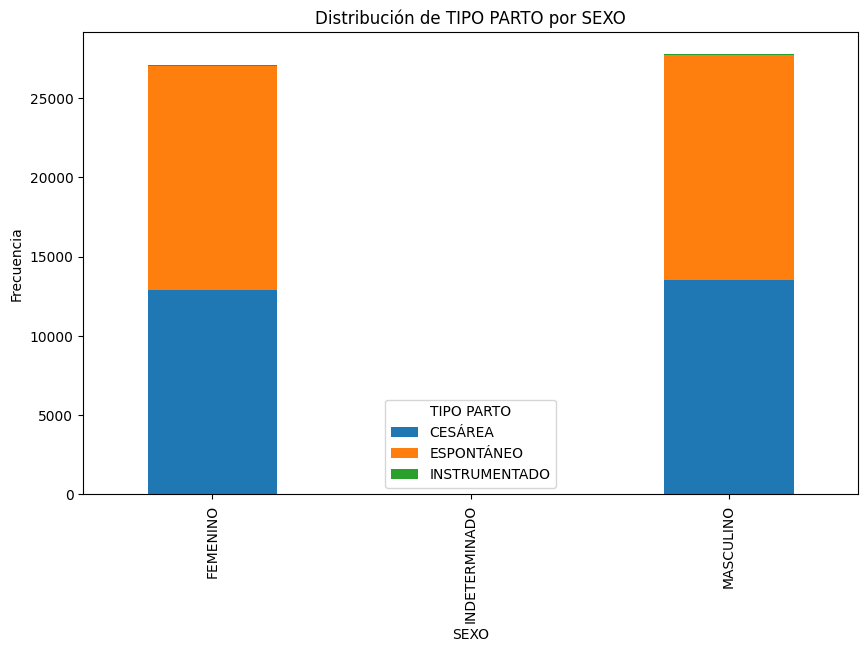

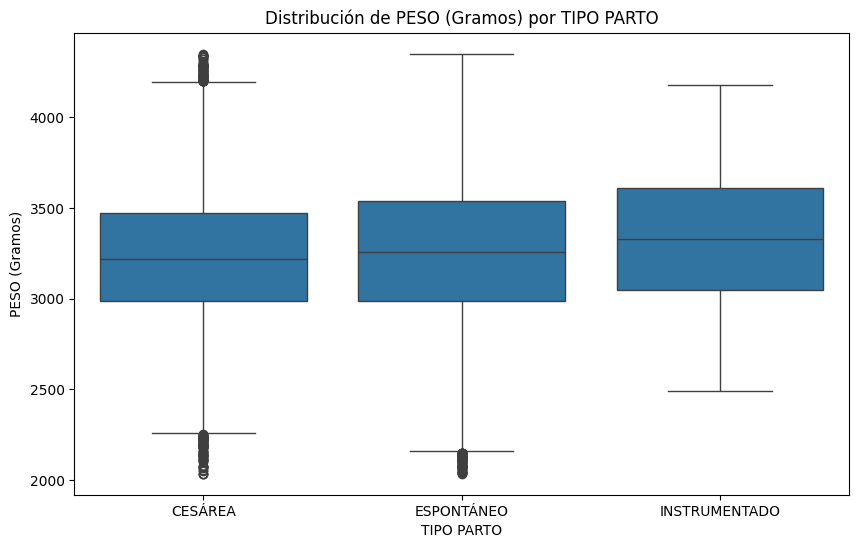

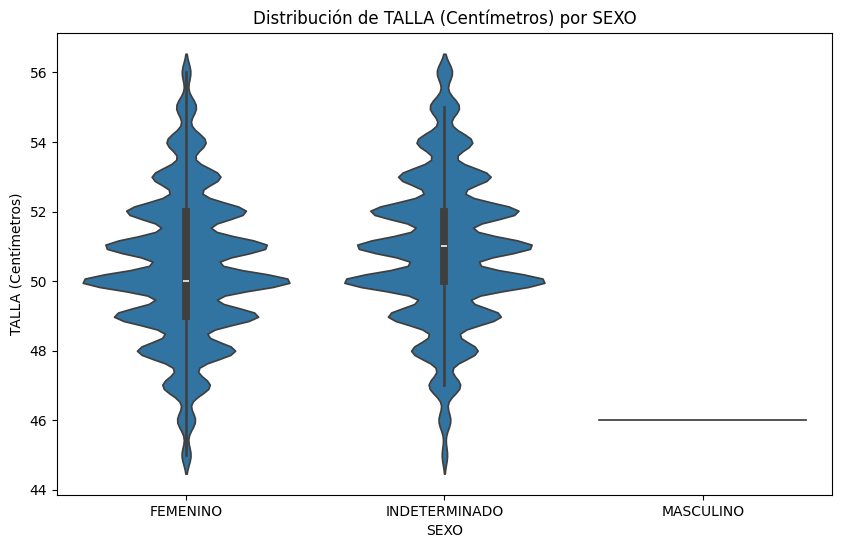

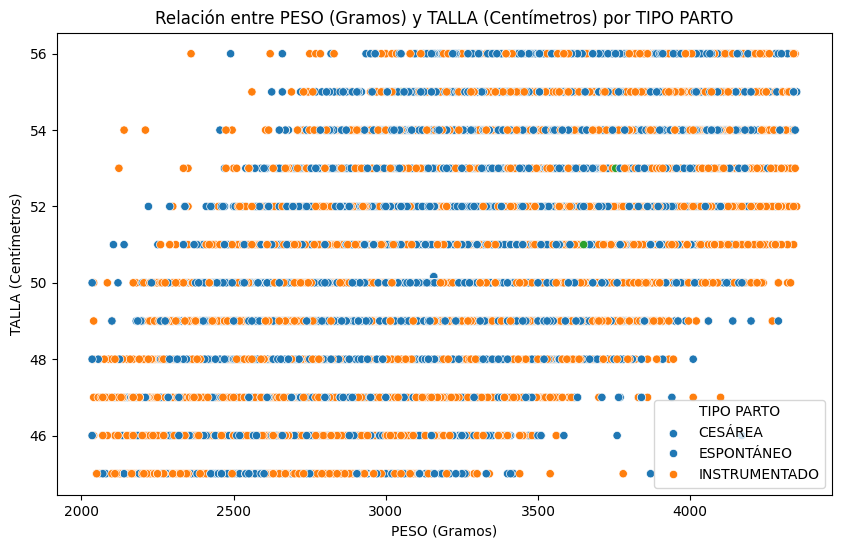

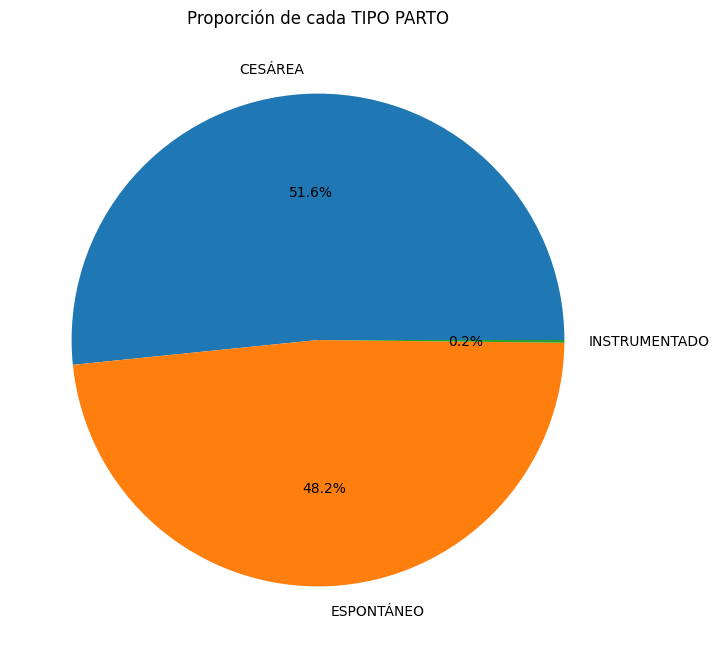

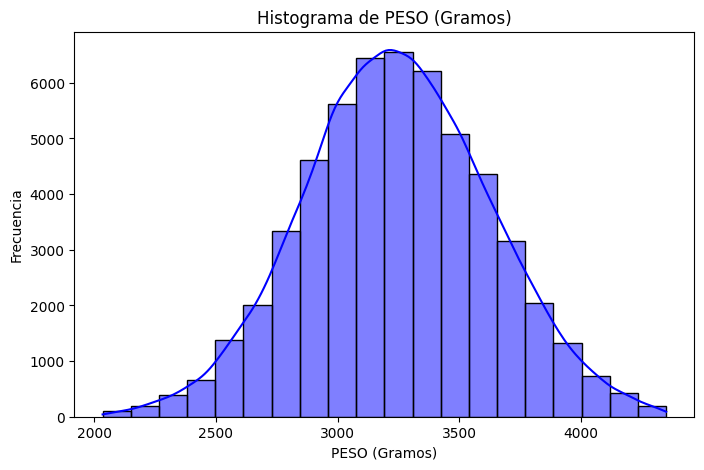

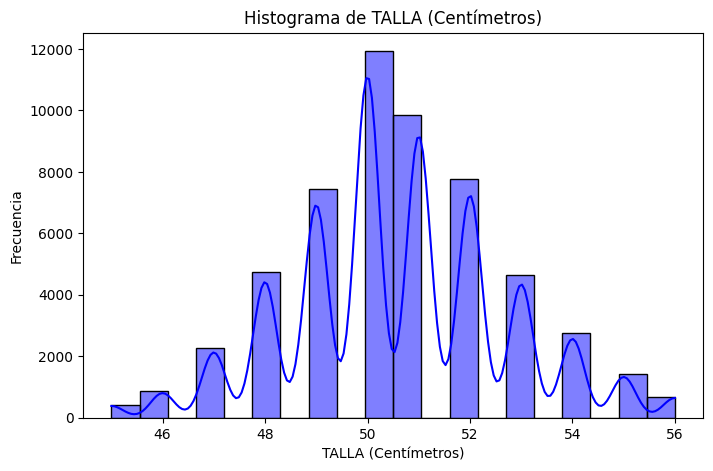

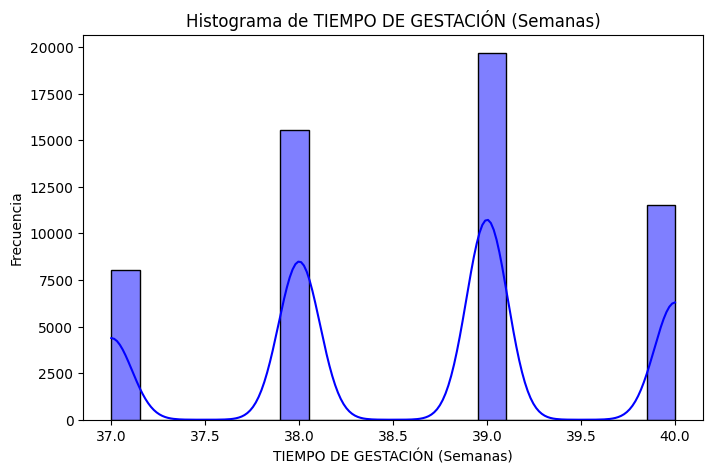

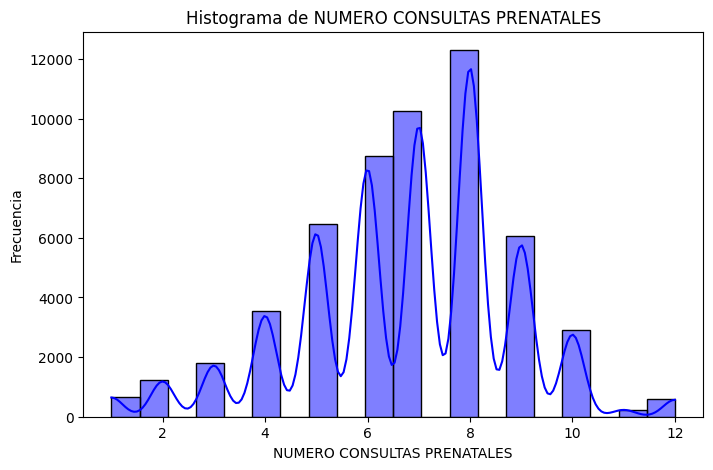

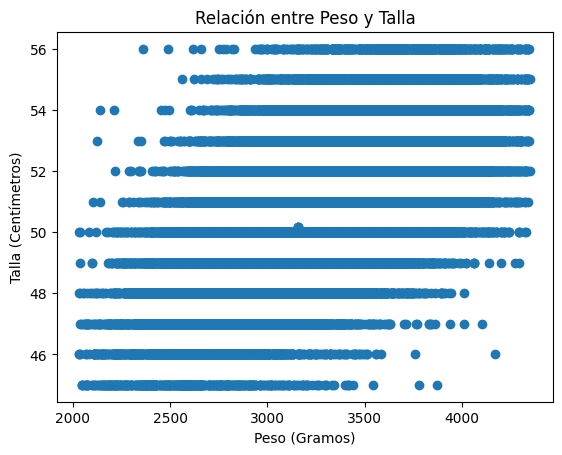

Correlación entre Peso y Talla: 0.5761292425736385


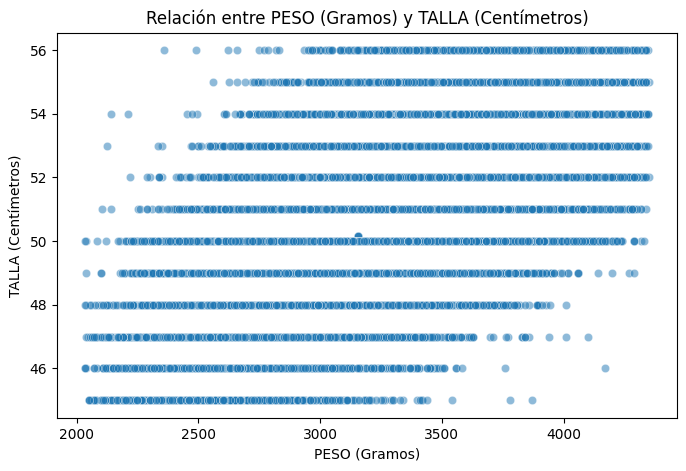

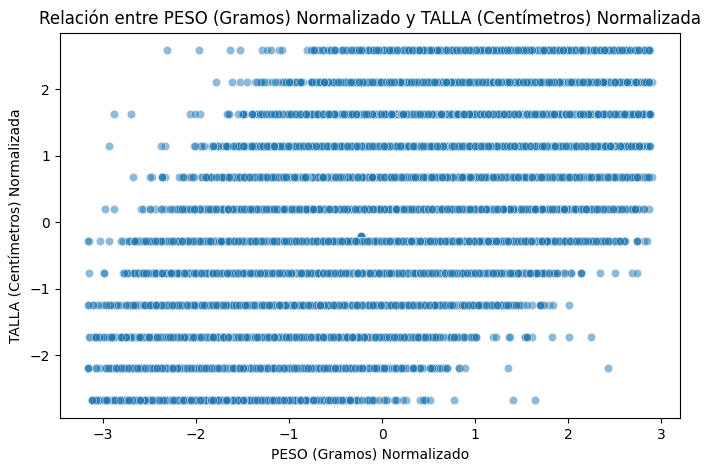


Matriz de correlación:
                               PESO (Gramos)  TALLA (Centímetros)  \
PESO (Gramos)                       1.000000             0.576129   
TALLA (Centímetros)                 0.576129             1.000000   
TIEMPO DE GESTACIÓN (Semanas)       0.344653             0.241970   
NUMERO CONSULTAS PRENATALES         0.047633             0.007530   

                               TIEMPO DE GESTACIÓN (Semanas)  \
PESO (Gramos)                                       0.344653   
TALLA (Centímetros)                                 0.241970   
TIEMPO DE GESTACIÓN (Semanas)                       1.000000   
NUMERO CONSULTAS PRENATALES                         0.003110   

                               NUMERO CONSULTAS PRENATALES  
PESO (Gramos)                                     0.047633  
TALLA (Centímetros)                               0.007530  
TIEMPO DE GESTACIÓN (Semanas)                     0.003110  
NUMERO CONSULTAS PRENATALES                       1.000000  


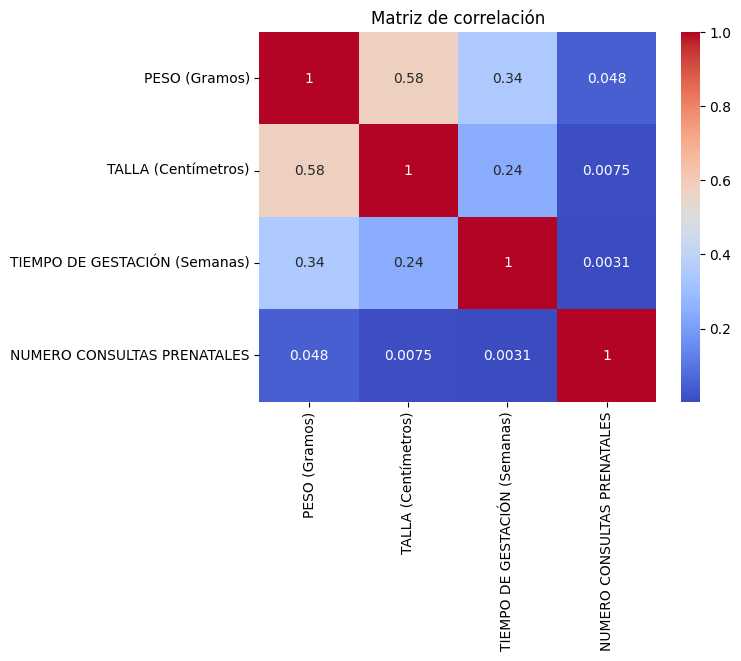

C:\Users\anfalear\AppData\Local\Temp\ipykernel_2288\1647075833.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peso_grupos=df_filtrado.groupby(grupos_peso)["PESO (Gramos)"].mean()


PESO (Gramos)
0-500                NaN
500-1000             NaN
1000-1500            NaN
1500-2000            NaN
2000-2500    2364.033288
2500-3000    2822.500415
3000-3500    3251.111652
3500-4000    3693.116247
4000-4500    4125.245731
4500-5000            NaN
Name: PESO (Gramos), dtype: float64


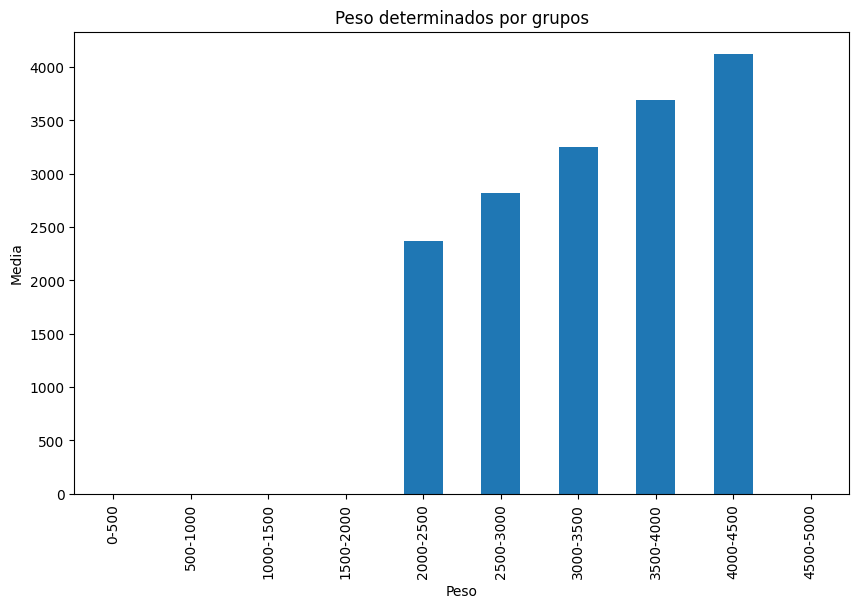

   HORA NACIMIENTO
0                5
1                2
2               20
3               16
4               12


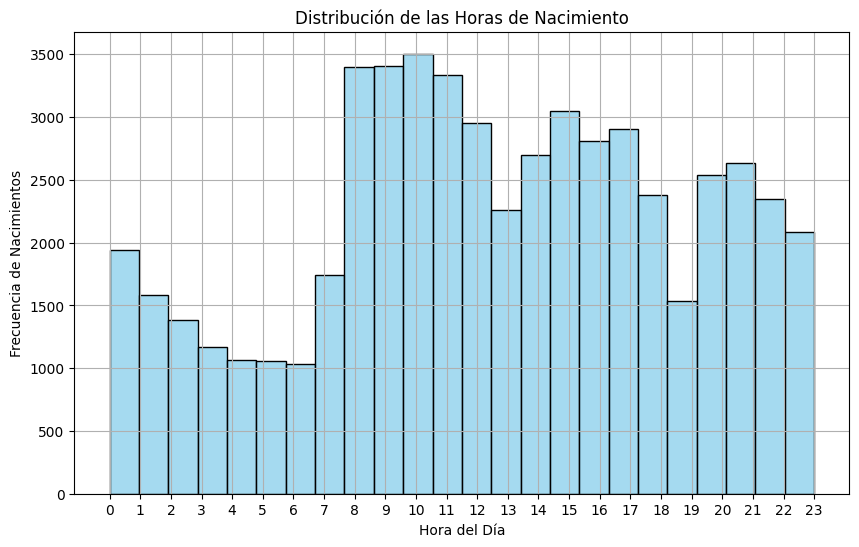

In [17]:
# Visualizacion de los datos

# se realizará inicialmente la visualización de los datos de acuerdo a las categorías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Variables categóricas y numéricas
numerical_vars = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)', 'NUMERO CONSULTAS PRENATALES']
categorical_vars = ['TIPO PARTO', 'SEXO', 'PARTO ATENDIDO POR', 'MULTIPLICIDAD EMBARAZO']

# Diccionario de categorías para cada variable categórica
categories = {
    'TIPO PARTO': {0: 'CESÁREA', 1: 'ESPONTÁNEO', 2: 'INSTRUMENTADO'},
    'SEXO': {0: 'FEMENINO', 1: 'INDETERMINADO', 2: 'MASCULINO'},
    'PARTO ATENDIDO POR': {0: 'AUXILIAR DE ENFERMERÍA', 1: 'ENFERMERO(A)', 2: 'MÉDICO', 3: 'OTRA PERSONA', 4: 'PARTERA', 5: 'PROMOTOR(A) DE SALUD'},
    'MULTIPLICIDAD EMBARAZO': {0: 'CUÁDRUPLE O MÁS', 1: 'DOBLE', 2: 'SIMPLE', 3: 'TRIPLE'}
}

# Diagrama de Barras Apiladas para TIPO PARTO y SEXO
crosstab = pd.crosstab(df_filtrado['SEXO'], df_filtrado['TIPO PARTO'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de TIPO PARTO por SEXO')
plt.xlabel('SEXO')
plt.ylabel('Frecuencia')
plt.legend(title='TIPO PARTO', labels=['CESÁREA', 'ESPONTÁNEO', 'INSTRUMENTADO'])
plt.show()

# Gráfico de Caja para PESO (Gramos) y TIPO PARTO
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO PARTO', y='PESO (Gramos)', data=df_filtrado)
plt.title('Distribución de PESO (Gramos) por TIPO PARTO')
plt.xlabel('TIPO PARTO')
plt.ylabel('PESO (Gramos)')
plt.xticks([0, 1, 2], ['CESÁREA', 'ESPONTÁNEO', 'INSTRUMENTADO'])
plt.show()

# Gráfico de Violín para TALLA (Centímetros) y SEXO
plt.figure(figsize=(10, 6))
sns.violinplot(x='SEXO', y='TALLA (Centímetros)', data=df_filtrado)
plt.title('Distribución de TALLA (Centímetros) por SEXO')
plt.xlabel('SEXO')
plt.ylabel('TALLA (Centímetros)')
plt.xticks([0, 1, 2], ['FEMENINO', 'INDETERMINADO', 'MASCULINO'])
plt.show()

# Gráfico de Dispersión para PESO (Gramos) y TALLA (Centímetros) por TIPO PARTO
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO (Gramos)', y='TALLA (Centímetros)', hue='TIPO PARTO', data=df_filtrado)
plt.title('Relación entre PESO (Gramos) y TALLA (Centímetros) por TIPO PARTO')
plt.xlabel('PESO (Gramos)')
plt.ylabel('TALLA (Centímetros)')
plt.legend(title='TIPO PARTO', labels=['CESÁREA', 'ESPONTÁNEO', 'INSTRUMENTADO'])
plt.show()

# Gráfico de Pastel para TIPO PARTO
plt.figure(figsize=(8, 8))
df_filtrado['TIPO PARTO'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['CESÁREA', 'ESPONTÁNEO', 'INSTRUMENTADO'])
plt.title('Proporción de cada TIPO PARTO')
plt.ylabel('')
plt.show()

# Histograma del peso y la talla
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtrado, x="PESO (Gramos)", bins=20, kde=True, color="blue", label="Peso")
plt.title("Histograma de PESO (Gramos)")
plt.xlabel("PESO (Gramos)")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de Talla
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtrado, x="TALLA (Centímetros)", bins=20, kde=True, color="blue", label="Talla")
plt.title("Histograma de TALLA (Centímetros)")
plt.xlabel("TALLA (Centímetros)")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de Tiempo de gestación (Semanas)
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtrado, x="TIEMPO DE GESTACIÓN (Semanas)", bins=20, kde=True, color="blue", label="Tiempo de Gestación (Semanas)")
plt.title("Histograma de TIEMPO DE GESTACIÓN (Semanas)")
plt.xlabel("TIEMPO DE GESTACIÓN (Semanas)")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de Número de consultas prenatales
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtrado, x="NUMERO CONSULTAS PRENATALES", bins=20, kde=True, color="blue", label="Número de Consultas Prenatales")
plt.title("Histograma de NUMERO CONSULTAS PRENATALES")
plt.xlabel("NUMERO CONSULTAS PRENATALES")
plt.ylabel("Frecuencia")
plt.show()

# Dispersión entre peso y talla
plt.scatter(df_filtrado['PESO (Gramos)'], df_filtrado['TALLA (Centímetros)'])
plt.xlabel('Peso (Gramos)')
plt.ylabel('Talla (Centímetros)')
plt.title('Relación entre Peso y Talla')
plt.show()
correlacion = df_filtrado['PESO (Gramos)'].corr(df_filtrado['TALLA (Centímetros)'])
print(f"Correlación entre Peso y Talla: {correlacion}")

# Gráfico de dispersión: Relación entre Peso y Talla
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtrado, x="PESO (Gramos)", y="TALLA (Centímetros)", alpha=0.5)
plt.title("Relación entre PESO (Gramos) y TALLA (Centímetros)")
plt.xlabel("PESO (Gramos)")
plt.ylabel("TALLA (Centímetros)")
plt.show()

# Gráfico de dispersión: Relación entre Peso(Normalizado) y Talla(Normalizado)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtrado, x="PESO (Gramos) Normalizado", y="TALLA (Centímetros) Normalizado", alpha=0.5)
plt.title("Relación entre PESO (Gramos) Normalizado y TALLA (Centímetros) Normalizada")
plt.xlabel("PESO (Gramos) Normalizado")
plt.ylabel("TALLA (Centímetros) Normalizada")
plt.show()

# Matriz de correlación
print("\nMatriz de correlación:")
# Select only numerical columns for correlation calculation
corr_matrix = df_filtrado[numerical_vars].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#GRÁFICO DE BARRAS: promedios por pesos

grupos_peso=pd.cut(df_filtrado["PESO (Gramos)"],bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000], labels=["0-500","500-1000","1000-1500","1500-2000","2000-2500","2500-3000","3000-3500","3500-4000","4000-4500","4500-5000"])
peso_grupos=df_filtrado.groupby(grupos_peso)["PESO (Gramos)"].mean()
print(peso_grupos)
peso_grupos.plot(kind="bar",figsize=(10,6))
plt.title("Peso determinados por grupos")
plt.xlabel("Peso")
plt.ylabel("Media")
plt.show()


# Convertir HORA NACIMIENTO a formato de 24 horas y extraer solo la hora
df_filtrado['HORA NACIMIENTO'] = pd.to_datetime(df_filtrado['HORA NACIMIENTO'], format='%H:%M:%S').dt.hour

# Verifica los primeros registros para confirmar la conversión
print(df_filtrado[['HORA NACIMIENTO']].head())

# Crear un histograma para observar la distribución de las horas de nacimiento
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['HORA NACIMIENTO'], bins=24, kde=False, color="skyblue")
plt.title('Distribución de las Horas de Nacimiento')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia de Nacimientos')
plt.xticks(range(0, 24))  # Ajustar los ticks del eje x para mostrar cada hora
plt.grid(True)
plt.show()













In [18]:
# Reconstruir las categorías originales desde los códigos
df_filtrado['TIPO PARTO'] = df_filtrado['TIPO PARTO'].astype('category')
df_filtrado['SEXO'] = df_filtrado['SEXO'].astype('category')
df_filtrado['PARTO ATENDIDO POR'] = df_filtrado['PARTO ATENDIDO POR'].astype('category')
df_filtrado['MULTIPLICIDAD EMBARAZO'] = df_filtrado['MULTIPLICIDAD EMBARAZO'].astype('category')

# Mostrar las categorías y sus códigos
categorias_tipo_parto = dict(enumerate(df_filtrado['TIPO PARTO'].cat.categories))
categorias_sexo = dict(enumerate(df_filtrado['SEXO'].cat.categories))
categorias_parto_atendido_por = dict(enumerate(df_filtrado['PARTO ATENDIDO POR'].cat.categories))
categorias_multiplicidad_embarazo = dict(enumerate(df_filtrado['MULTIPLICIDAD EMBARAZO'].cat.categories))

print("Categorías de 'TIPO PARTO':")
for code, category in categorias_tipo_parto.items():
    print(f"{code}: {category}")

print("\nCategorías de 'SEXO':")
for code, category in categorias_sexo.items():
    print(f"{code}: {category}")

print("\nCategorías de 'PARTO ATENDIDO POR':")
for code, category in categorias_parto_atendido_por.items():
    print(f"{code}: {category}")

print("\nCategorías de 'MULTIPLICIDAD EMBARAZO':")
for code, category in categorias_multiplicidad_embarazo.items():
    print(f"{code}: {category}")



Categorías de 'TIPO PARTO':
0: CESÁREA
1: ESPONTÁNEO
2: INSTRUMENTADO

Categorías de 'SEXO':
0: FEMENINO
1: INDETERMINADO
2: MASCULINO

Categorías de 'PARTO ATENDIDO POR':
0: AUXILIAR DE ENFERMERÍA
1: ENFERMERO(A)
2: MÉDICO
3: OTRA PERSONA
4: PARTERA
5: PROMOTOR(A) DE SALUD

Categorías de 'MULTIPLICIDAD EMBARAZO':
0: CUÁDRUPLE O MÁS
1: DOBLE
2: SIMPLE
3: TRIPLE


In [19]:
#valores para cada categoría


# Variables numéricas y categóricas
numerical_vars = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)', 'NUMERO CONSULTAS PRENATALES']
categorical_vars = ['TIPO PARTO', 'SEXO', 'PARTO ATENDIDO POR', 'MULTIPLICIDAD EMBARAZO']

# Diccionario de categorías para cada variable categórica
categories = {
    'TIPO PARTO': {0: 'CESÁREA', 1: 'ESPONTÁNEO', 2: 'INSTRUMENTADO'},
    'SEXO': {0: 'FEMENINO', 1: 'INDETERMINADO', 2: 'MASCULINO'},
    'PARTO ATENDIDO POR': {0: 'AUXILIAR DE ENFERMERÍA', 1: 'ENFERMERO(A)', 2: 'MÉDICO', 3: 'OTRA PERSONA', 4: 'PARTERA', 5: 'PROMOTOR(A) DE SALUD'},
    'MULTIPLICIDAD EMBARAZO': {0: 'CUÁDRUPLE O MÁS', 1: 'DOBLE', 2: 'SIMPLE', 3: 'TRIPLE'}
}

# Verificar la distribución de las categorías en el DataFrame
for cat_var, cat_dict in categories.items():
    print(f"\nDistribución de {cat_var}:")
    print(df_filtrado[cat_var].value_counts())





Distribución de TIPO PARTO:
TIPO PARTO
ESPONTÁNEO       28285
CESÁREA          26424
INSTRUMENTADO       98
Name: count, dtype: int64

Distribución de SEXO:
SEXO
MASCULINO        27736
FEMENINO         27070
INDETERMINADO        1
Name: count, dtype: int64

Distribución de PARTO ATENDIDO POR:
PARTO ATENDIDO POR
MÉDICO                    54736
OTRA PERSONA                 30
ENFERMERO(A)                 21
PARTERA                      10
AUXILIAR DE ENFERMERÍA        8
PROMOTOR(A) DE SALUD          2
Name: count, dtype: int64

Distribución de MULTIPLICIDAD EMBARAZO:
MULTIPLICIDAD EMBARAZO
SIMPLE             54562
DOBLE                243
CUÁDRUPLE O MÁS        1
TRIPLE                 1
Name: count, dtype: int64


In [20]:
# modelo de predicción básico

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Variables
X = df_filtrado[["TIEMPO DE GESTACIÓN (Semanas)", "TALLA (Centímetros)"]]
y = df_filtrado["PESO (Gramos)"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Valor r cuadrado
r_cuadrado = model.score(X_test, y_test)
print("Valor r cuadrado:", r_cuadrado)

# Predicción para una talla de 47 cm y 37 semanas de gestación
nueva_muestra = np.array([[37, 47]])
prediccion_peso = model.predict(nueva_muestra)
print(f"Predicción del peso para 47 cm de talla y 37 semanas de gestación: {prediccion_peso[0]} gramos")


Error cuadrático medio: 91225.75929654331
Valor r cuadrado: 0.37983081979639033
Predicción del peso para 47 cm de talla y 37 semanas de gestación: 2759.7386293167965 gramos


c:\Users\anfalear\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Datos proporcionados del neonato con 3250 gramos de peso, 50.3 cm de talla y 38 semanas de gestación

# Obtener los nombres de las columnas existentes
column_names = df_filtrado.columns.tolist()

# Agregar los datos proporcionados, asegurando que se alineen con las columnas existentes
# Se crean valores NaN para las columnas que no tienen datos proporcionados.
new_row_data = pd.Series([3250, 50.3, 38] + [np.nan] * (len(column_names) - 3), index=column_names)
df_filtrado = pd.concat([df_filtrado, new_row_data.to_frame().T], ignore_index=True)

# Crear la columna 'LONGITUD MANO (Centímetros)' y asignar el valor para la nueva fila
np.random.seed(42)
df_filtrado['LONGITUD MANO (Centímetros)'] = df_filtrado['TALLA (Centímetros)'] * 0.15 + np.random.normal(0, 0.2, df_filtrado.shape[0])
df_filtrado.loc[len(df_filtrado.index)-1, 'LONGITUD MANO (Centímetros)'] = 6.25

# Convert numeric columns to numeric type
for col in ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)', 'NUMERO CONSULTAS PRENATALES']:
    df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors='coerce')

# Rellenar valores NaN con la media de cada columna (solo para columnas numéricas)
df_filtrado.fillna(df_filtrado.select_dtypes(include=['number']).mean(), inplace=True)
print(df_filtrado)

# Preparar los datos
X = df_filtrado[['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)']]
y = df_filtrado['LONGITUD MANO (Centímetros)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalizar los datos de salida
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Selección de variables predictoras y objetivo
X = df_filtrado[['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)']]
y = df_filtrado['LONGITUD MANO (Centímetros)']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Definir y entrenar el modelo de red neuronal
mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train_scaled)

# Evaluar el modelo
y_pred_scaled = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

# Hacer predicción para un nuevo caso
nueva_muestra = np.array([[3250, 50.3, 38]])
nueva_muestra_scaled = scaler.transform(nueva_muestra)
prediccion_longitud_scaled = mlp.predict(nueva_muestra_scaled)
prediccion_longitud = scaler_y.inverse_transform(prediccion_longitud_scaled.reshape(-1, 1))
print(f"Predicción de la longitud de la mano: {prediccion_longitud[0][0]:.2f} cm")


            SEXO  PESO (Gramos)  TALLA (Centímetros)  HORA NACIMIENTO  \
0       FEMENINO         3520.0                 53.0         5.000000   
1       FEMENINO         3180.0                 52.0         2.000000   
2       FEMENINO         3000.0                 50.0        20.000000   
3      MASCULINO         3540.0                 55.0        16.000000   
4       FEMENINO         3430.0                 53.0        12.000000   
...          ...            ...                  ...              ...   
54803  MASCULINO         3085.0                 54.0        23.000000   
54804  MASCULINO         3855.0                 50.0        13.000000   
54805   FEMENINO         2235.0                 46.0         9.000000   
54806  MASCULINO         3450.0                 49.0         6.000000   
54807     3250.0           50.3                 38.0        12.509424   

      PARTO ATENDIDO POR  TIEMPO DE GESTACIÓN (Semanas)  \
0                 MÉDICO                      40.000000   
1    

C:\Users\anfalear\AppData\Local\Temp\ipykernel_2288\3361247569.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_filtrado = pd.concat([df_filtrado, new_row_data.to_frame().T], ignore_index=True)
C:\Users\anfalear\AppData\Local\Temp\ipykernel_2288\3361247569.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_filtrado = pd.concat([df_filtrado, new_row_data.to_frame().T], ignore_index=True)
C:\Users\anfalear\AppData\Local\Temp\ipykernel_2288\3361247569.py:16: FutureWarning: The behavior 

Error cuadrático medio en el conjunto de prueba: 0.2873323128329131
Predicción de la longitud de la mano: 7.53 cm


c:\Users\anfalear\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Guardar datos limpios
df_filtrado.to_csv('nacBucaramanga2016_2023limpios.csv', index=False)
print("Datos limpios guardados en nacBucaramanga2016_2023limpios.csv")

Datos limpios guardados en nacBucaramanga2016_2023limpios.csv
